<a href="https://colab.research.google.com/github/RodolfoGaspar/ImersaoDadosAlura2020/blob/main/D%C3%A9bora_Yohane_Martins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Existe Meritocracia no Rio de Janeiro?**


##**Introdução**

Sei que a pergunta é ampla e transcende o conjunto de dados do ENEM, mas ele é uma boa amostra de uma situação em que, a priori, bastaria se esforçar e, independente de sua condição social, você alcançaria seu bom resultado.

Esta análise busca perceber se existem correlações nas variáveis sócio-econômicas e na nota do ENEM dos candidatos.

Começamos baixando os dados apenas do Rio de Janeiro, porque afinal quero fazer a análise somente com os dados do meu estado =)

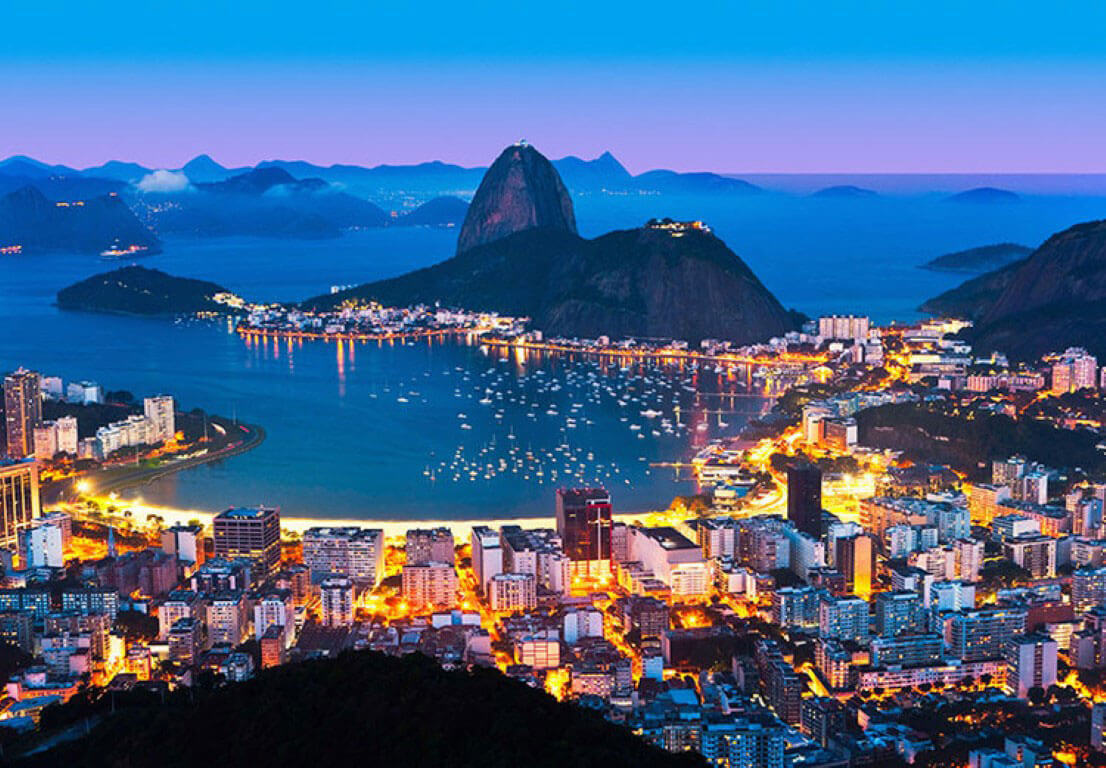

In [ ]:
#baixando os dados do Rio de Janeiro
estado = "rj"
uri = f"https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/{estado}.csv.zip?raw=true"
arquivo = f'{estado}.csv.zip'
!wget -O $arquivo $uri

--2020-10-25 23:51:14--  https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/rj.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/rj.csv.zip [following]
--2020-10-25 23:51:14--  https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/rj.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/rj.csv.zip [following]
--2020-10-25 23:51:14--  https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/rj.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githu

In [ ]:
#importando bibliotecas importantes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#lendo os dados do Rio de Janeiro
dados = pd.read_csv(arquivo,sep=";")
dados.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,10600,190001015227,2019,3302056,Italva,33,RJ,32,F,1,3,1,1505106.0,Óbidos,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,CDADCADAABDDCEBABCBCEBABCECAAAEBDEEDCBDDCCDBA,99999ABCEDBCEEACBEABAAEEEDCBDEBAAABDBDCADECDDE...,BBAEBDACABEABBDDEACEDCDCBADDCACDBDABAECADECAE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,140.0,120.0,120.0,120.0,140.0,640.0,B,B,A,A,5,C,A,B,B,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
1,21074,190001025702,2019,3305109,São João de Meriti,33,RJ,32,M,1,3,1,3301702.0,Duque de Caxias,33.0,RJ,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,F,F,3,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A
2,22657,190001027285,2019,3304557,Rio de Janeiro,33,RJ,26,M,1,3,1,1100254.0,Presidente Médici,11.0,RO,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,D,D,1,E,A,B,E,A,A,B,A,B,A,B,A,A,B,A,A,B,A,B,B
3,30365,190001034993,2019,3304557,Rio de Janeiro,33,RJ,19,F,1,3,1,1502400.0,Castanhal,15.0,PA,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,BDBCDEDCAACCEDAAEECABDDECDBDBABADCAABBBDEECAB,BDDB*99999DABEBDDAEBDADECAACDBDACEBBEBEACDCDBB...,ECDBADBCCDECDCBBACAEBACBBCDBEBCABDEACEEBDCBAB,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,120.0,100.0,100.0,560.0,C,E,B,D,3,B,A,B,B,A,A,B,A,B,A,A,A,A,A,A,A,B,A,A,B
4,60937,190001065566,2019,3304557,Rio de Janeiro,33,RJ,22,F,1,3,1,1501402.0,Belém,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,B,3,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,C,A,A,A


##**Análise Exploratória**

Primeiramente, vamos conhecer um pouco mais desse nosso conjunto de dados nessa etapa de Análise Exploratória. Queremos responder algumas perguntas básicas sobre os dados, como: 

* Quantas pessoas fizeram ENEM no Rio de Janeiro? 
* Como é o perfil de idade? 
* Qual o perfil de renda? 
* Qual o perfil de gênero?

In [ ]:
len(dados)

338710

São **338710 pessoas** que fizeram o ENEM em 2019 no Rio de Janeiro. Essa é uma excelente amostra para a gente trabalhar em cima.

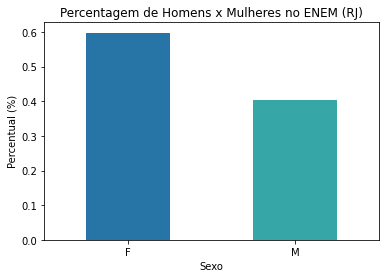

In [ ]:
#plotando o gráfico
dados['TP_SEXO'].value_counts(normalize = True).plot.bar(rot = 0,color = ['#2675A6','#37A6A6'])
#organizado o gráfico
plt.title('Percentagem de Homens x Mulheres no ENEM (RJ)');
plt.xlabel('Sexo')
plt.ylabel('Percentual (%)');

Vemos que **60% das pessoas são mulheres e 40% são homens**. Wow! Mais mulheres que homens no ENEM RJ de 2019. 

Felizmente, essa inversão da desigualdade de gênero observada no dia a dia é um fato comprovado no ENEM e que, como mulher que sou, me dá muito orgulho.

Quer saber mais sobre isso? Dá uma olhada nesse artigo super legal que encontrei fazendo esta análise: [Artigo](https://www.brazilianjournals.com/index.php/BRJD/article/view/11377)!

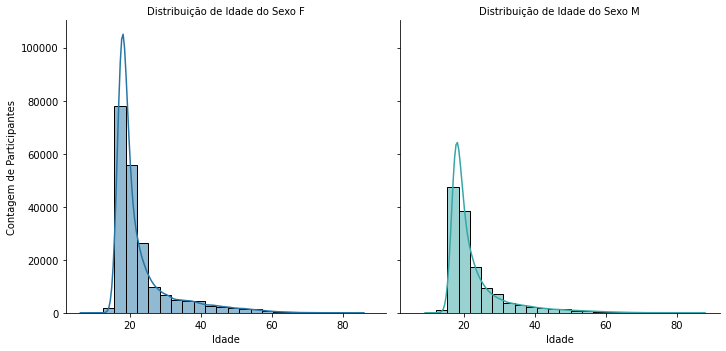

In [ ]:
#criando grid de gráficos
d = {'color': ['#2675A6','#37A6A6']}
g = sns.FacetGrid(dados, col = 'TP_SEXO', hue='TP_SEXO', height=5, hue_kws=d);
g.map(sns.histplot, 'NU_IDADE', bins=25, kde = True);

#organizando o gráfico
g.set_axis_labels("Idade", "Contagem de Participantes");
g.set_titles(template='Distribuição de Idade do Sexo {col_name}');

Podemos ver que a **maioria dos participantes é jovem**, com 20 anos ou menos, o que era esperado. Entretanto, é possível perceber que essa tendência é independente do participante ser do sexo feminino ou masculino, o que já não é um fato tão óbvio.

A curva de idades sugere um comportamento assimétrico a direita, ou seja, uma distribuição Lognormal parece modelar bem esses dados. Isso significa que apesar de a maioria dos participantes terem 20 anos ou menos, sempre vão existir participantes na cauda longa, com 50 anos ou mais.

Isso é uma lição de vida para quem acha que está tarde demais para começar algo novo, como um vestibular ou faculdade. Esses participantes da cauda longa estão aí para nos ensinar uma lição. Legal né? =)

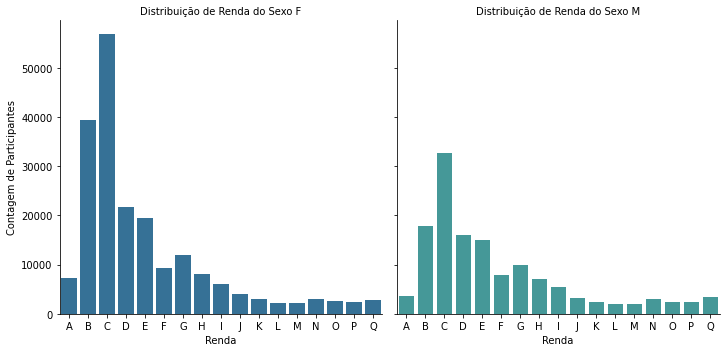

In [ ]:
#criando coluna com dados de renda ordenados
dados_ordenados=dados['Q006'].unique()
dados_ordenados.sort()

#criando grid de gráficos
d = {'color': ['#2675A6','#37A6A6']}
g = sns.FacetGrid(dados, col = 'TP_SEXO', hue='TP_SEXO', height=5, hue_kws=d);
g.map(sns.countplot, 'Q006', order=dados_ordenados);

#organizando o gráfico
g.set_axis_labels("Renda", "Contagem de Participantes");
g.set_titles(template='Distribuição de Renda do Sexo {col_name}');

A partir dos gráficos acima, vemos que **a maioria dos participantes do ENEM (RJ) é da classe C**, ou seja, sua família tem renda entre R\$998,00 e R\$1497,00. Isso é uma evidência da desigualdade de distribuição de renda no Brasil. Não notamos diferença significativa nessa distribuição para famílias de participantes do sexo masculino e feminino.

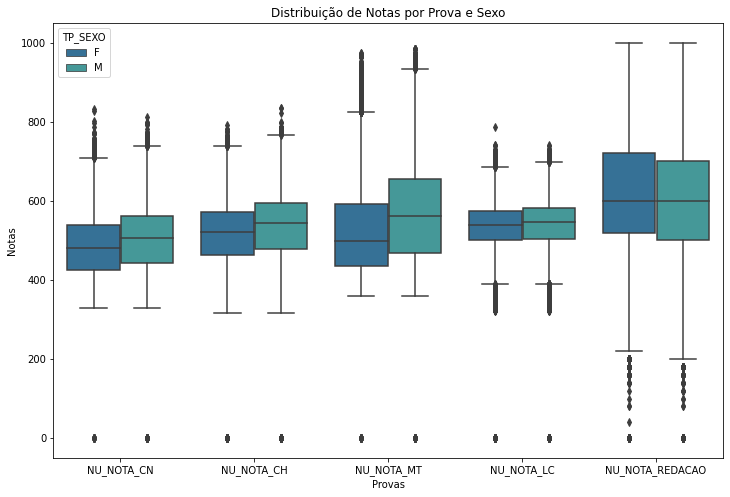

In [ ]:
#reorganizando os dados
provas_genero=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO","TP_SEXO"]
dados_melt=dados[provas_genero].melt(id_vars="TP_SEXO")
dados_melt=dados_melt.dropna()

#plotando o gráfico
plt.figure(figsize=(12,8))
sns.boxplot(x="variable",y="value",data=dados_melt,hue="TP_SEXO", palette=['#2675A6','#37A6A6']);

#organizando o gráfico
plt.xlabel('Provas');
plt.ylabel('Notas');
plt.title('Distribuição de Notas por Prova e Sexo');

Antes de seguir analisando, vale lembrar que CN é Ciências Naturais, CH é Ciências Humanas, MT é Matemática, LC é Linguagens e Códigos.

Pois bem, analisando os gráficos, vemos diferenças entre as notas dos homens e das mulheres. Os **participantes do sexo masculino tem notas levemente maiores que as participantes do sexo feminino** nas provas, exceto em redação. =(

Essa situação é **menos grave na prova de LC**, onde a diferença na mediana e nos quartis parece insignificante, e **mais grave na prova de MT**, onde a diferença é bem maior (100 pontos aproximadamente em cada uma das medidas do gráfico). 

Por fim, é possível perceber a presença de participantes com nota 0. Como nossa intenção é analisar o efeito das variáveis sócio-econômicas no resultado, precisamos descontar as pessoas que não participaram das provas. Para isso, vamos criar uma coluna para contabilizar a nota total e dividir o conjunto de dados em 2: dados sem notas zero e dados de notas zeros. 



In [ ]:
#criando coluna de NOTA TOTAL
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"]=dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")

#separando os conjuntos de dados
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL !=0 and NU_NOTA_CN!=0 and NU_NOTA_CH!=0 and NU_NOTA_MT!=0 and NU_NOTA_LC!=0 and NU_NOTA_REDACAO!=0" )
dados_de_notas_zero = dados.query("NU_NOTA_TOTAL ==0 or NU_NOTA_CN==0 or NU_NOTA_CH==0 or NU_NOTA_MT==0 or NU_NOTA_LC==0 or NU_NOTA_REDACAO==0")

In [ ]:
print('Tamanho de Dados sem Notas Zero:', len(dados_sem_notas_zero))
print('Tamanho de Dados de Notas Zero:', len(dados_de_notas_zero))

Tamanho de Dados sem Notas Zero: 251495
Tamanho de Dados de Notas Zero: 87215


Nossa! **87215 participantes tiraram zero em pelo menos uma prova**. Precisamos entender mais isso, mas esse é um trabalho para o próximo desafio da Alura, hehehe.

Eba! Terminamos essa parte de Análise Exploratória e vamos começar a Análise das Variáveis Sócio-Econômicas na nota =)

## **Análise das Variáveis Sócio-Econômicas**

Para começar, vamos tentar entender a **correlação** do ambiente, da raça e do gênero de cada candidato com a nota de sua prova. Veja que eu falei correlação e não causalidade. O objetivo desse estudo é trazer uma provocação sobre a meritrocacia e não atribuir um determinismo entre condição social e resultado. 

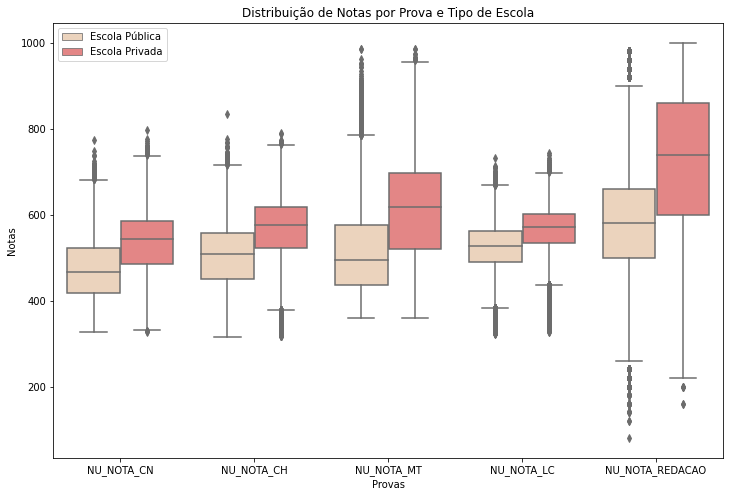

In [ ]:
#deixando apenas os dados de quem respondeu o tipo de escola
dados_completos = dados_sem_notas_zero.query('TP_ESCOLA != 1')

#reorganizando os dados
provas_escola=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO","TP_ESCOLA"]
dados_melt=dados_completos[provas_escola].melt(id_vars="TP_ESCOLA")
dados_melt=dados_melt.dropna()

#plotando o gráfico
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="variable",y="value",data=dados_melt,hue="TP_ESCOLA", palette=['#F2D2B6','#F27777']);

#organizando o gráfico
plt.xlabel('Provas');
plt.ylabel('Notas');
plt.title('Distribuição de Notas por Prova e Tipo de Escola');
handles, _ = ax.get_legend_handles_labels()       
ax.legend(handles, ['Escola Pública', 'Escola Privada'], loc="best");

Wow! **Todas as notas das provas são de 50 a 200 pontos mais altas se o participante veio de escola privada**, com os piores casos acontecendo nas provas de **Matemática** e **Redação**. Além disso, é possível perceber que notas a partir de um determinado valor são outliers apenas para quem veio de escola pública, ou seja, os dados indicam que não é normal participantes vindos de escolas públicas tirarem notas tão altas. O contrário vale para as escolas privadas, ou seja, os dados indicam que não é normal participantes vindos de escola privada tirarem notas tão baixas.

Isso é um indicativo forte de que os ensinos são diferentes em escolas públicas e privadas aqui no Rio de Janeiro, em especial nessas duas disciplinas (Matemática e Redação).

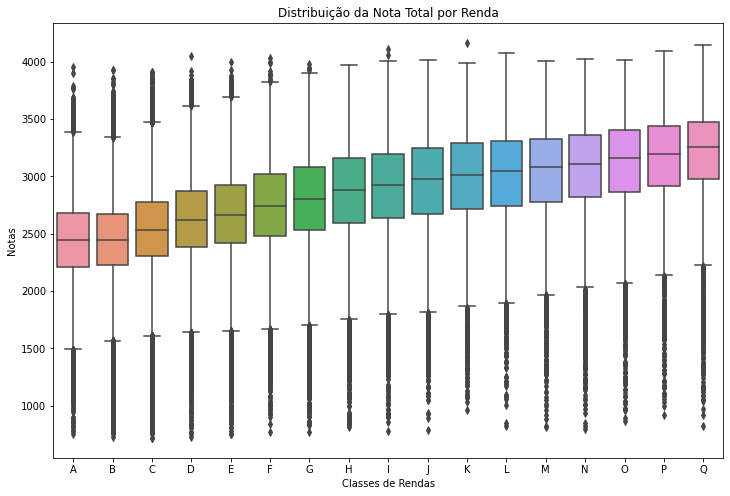

In [ ]:
#plotando o gráfico
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="Q006",y="NU_NOTA_TOTAL",data=dados_sem_notas_zero,order=dados_ordenados);

#organizando o gráfico
plt.xlabel('Classes de Rendas');
plt.ylabel('Notas');
plt.title('Distribuição da Nota Total por Renda');

Nossa! Mais uma vez a condição social parece fazer diferença na nota. Indo da classe A (Nenhuma Renda) para a classe Q (renda de mais de R\$19.960,00) aumentamos **por volta de 800 pontos na nota total**!

Além disso, repetiu-se aquele comportamento dos outliers: quanto menor a classe de renda, maior o número de outliers nas notas superiores, quanto maior classe, maior o número de outliers nas notas inferiores.



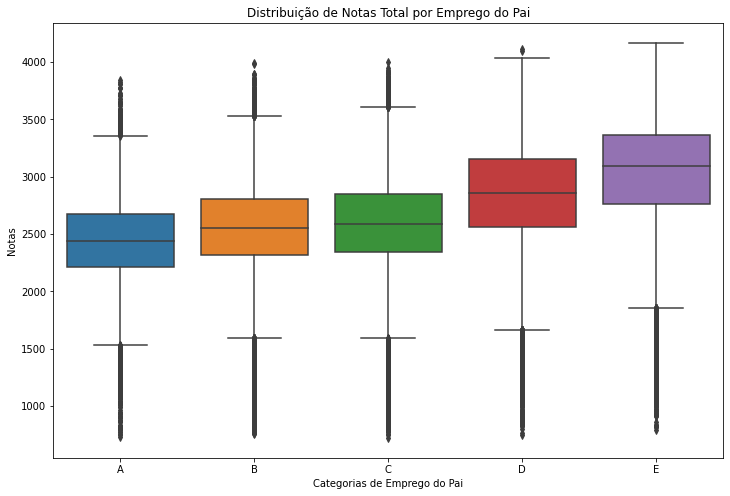

In [ ]:
#deixando apenas os dados de quem respondeu o tipo de emprego do pai
dados_completos = dados_sem_notas_zero.query('Q003 != "F"')

#criando coluna com dados de renda ordenados
dados_ordenados=dados_completos['Q003'].unique()
dados_ordenados.sort()

#plotando o gráfico
plt.figure(figsize=(12,8))
sns.boxplot(x="Q003",y="NU_NOTA_TOTAL",data=dados_completos, order = dados_ordenados);

#organizando o gráfico
plt.xlabel('Categorias de Emprego do Pai');
plt.ylabel('Notas');
plt.title('Distribuição de Notas Total por Emprego do Pai');

Analisando o gráfico acima, podemos perceber mais uma vez que a condição social influencia na nota total. Aqui temos **uma diferença de 800 pontos para mais na nota total com a variação do emprego do pai** da classe A (lavrador) para a classe E (engenheiro). Será que esse comportamento se mantém com a variação do emprego da mãe?

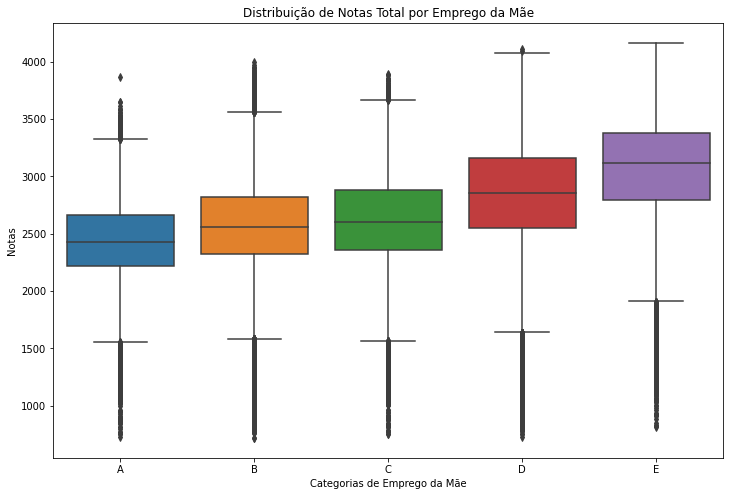

In [ ]:
#deixando apenas os dados de quem respondeu o tipo de emprego da mãe
dados_completos = dados_sem_notas_zero.query('Q004 != "F"')

#criando coluna com dados de renda ordenados
dados_ordenados=dados_completos['Q004'].unique()
dados_ordenados.sort()

#plotando o gráfico
plt.figure(figsize=(12,8))
sns.boxplot(x="Q004",y="NU_NOTA_TOTAL",data=dados_completos, order = dados_ordenados);

#organizando o gráfico
plt.xlabel('Categorias de Emprego da Mãe');
plt.ylabel('Notas');
plt.title('Distribuição de Notas Total por Emprego da Mãe');

Ainda bem que o emprego da mãe também influencia, né? Afinal isso é um indicativo de que a prosperidade em casa também está vindo das mulheres =)

Aqui temos mais uma vez **uma diferença de 800 pontos para mais na nota total com a variação do emprego da mãe** da classe A (lavradora) para a classe E (engenheira).

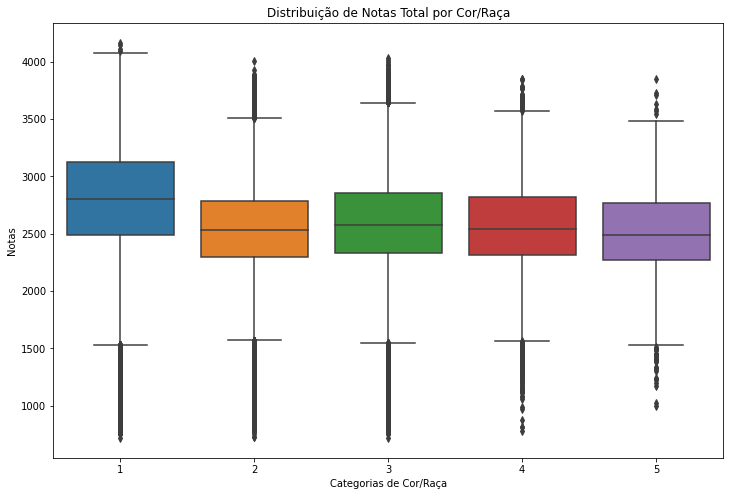

In [ ]:
#deixando apenas os dados de quem respondeu o tipo de cor/raça
dados_completos = dados_sem_notas_zero.query('TP_COR_RACA != 0')

#criando coluna com dados de renda ordenados
dados_ordenados=dados_completos['TP_COR_RACA'].unique()
dados_ordenados.sort()

#plotando o gráfico
plt.figure(figsize=(12,8))
sns.boxplot(x="TP_COR_RACA",y="NU_NOTA_TOTAL",data=dados_completos, order = dados_ordenados);

#organizando o gráfico
plt.xlabel('Categorias de Cor/Raça');
plt.ylabel('Notas');
plt.title('Distribuição de Notas Total por Cor/Raça');

Antes de seguir analisando, vale lembrar que 1 - branca, 2 - preta, 3 - parda, 4 - amarela, 5 - indígena. 

É possível ver que saindo de qualquer cor/raça para branca, **há um aumento de 250 pontos no máximo**. Isso é triste, mas não é uma diferença tão grande quanto as outras que observamos.

Vale notar, entretanto, que a dispersão das notas dos brancos é bem maior do que a das outras cores/raças. Ou seja, as outras cores/raças tiram notas mais baixas e com menos variação... 

Agora que analisamos o efeito de várias variáveis na nota total, a pergunta que fica é: qual o efeito de todas elas juntas? Será que elas tem efeito cumulativo ou são correlacionadas?

Essa análise vai ser brevemente explorada na próxima seção: Machine Learning.

## **Machine Learning**

Para treinar o nosso modelo de Machine Learning, primeiro, faremos um processamento dos dados para excluir aqueles que não responderam pelo menos uma das categorias que vamos considerar.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import warnings

#para remover os warnings que não estavam condizentes com a beleza do trabalho =)
warnings.filterwarnings('ignore')

#deixando apenas os dados de quem respondeu todos os campos
dados_completos = dados_sem_notas_zero.query('TP_COR_RACA != 0 and TP_ESCOLA != 1 and Q003 != "F" and Q004 != "F"')
print('Sobraram', len(dados_completos), "dados completos.")

lb_make = LabelEncoder()
dados_completos["SEXO_N"] = lb_make.fit_transform(dados_completos["TP_SEXO"])
dados_completos["Q003_N"] = lb_make.fit_transform(dados_completos["Q003"])
dados_completos["Q004_N"] = lb_make.fit_transform(dados_completos["Q004"])
dados_completos["Q006_N"] = lb_make.fit_transform(dados_completos["Q006"])

campos_x = ['SEXO_N', 'TP_COR_RACA', 'TP_ESCOLA', 'Q003_N', 'Q004_N', 'Q006_N']

x = dados_completos[campos_x]
y = dados_completos['NU_NOTA_TOTAL']

Sobraram 68577 dados completos.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

x_treino,x_teste,y_treino,y_teste=train_test_split(x,y,test_size=0.25)
modelo = RandomForestRegressor()
modelo.fit(x_treino, y_treino)
print('Erro médio quadrático do Modelo:',mean_squared_error(y_teste, modelo.predict(x_teste))

167009.77404450224

Tínhamos vários modelos disponíveis, DecisionTreeRegressor e LinearSVR, por exemplo. Entretanto, escolhemos o RandomForestRegressor por acreditarmos mais no poder das florestas aleatórias =)

Além disso, esse modelo permite que analisemos a importância de cada um dos atributos no resultado final, coisa que muito nos interessa.

O modelo, no fim, não teve um grande resultado, com um MSE de 167009. Entretanto, não temos tempo hábil para procurar por modelos melhores e esse já traz alguns resultados interessantes.

In [ ]:
modelo.feature_importances_

array([0.02765708, 0.05311964, 0.19381808, 0.05941499, 0.05784735,
       0.60814286])

Aqui, podemos ver a importância de cada um dos atributos para a nota total. Em primeiro lugar, com 61% de importância, temos a classe de renda. Em segundo lugar, com 19% de importância, temos o tipo de escola. Esses dois atributos são responsáveis por 80% da variação na nota total.

Como esperávamos, existe sim correlação entre os atributos, sendo que os dois que preponderam agregando os efeitos dos outros são **classe de renda** e **tipo de escola**.

##**Conclusão**

Gente, quanta coisa vimos nessa semana de Imersão de Dados da Alura e nesse notebook analisando os dados do ENEM (RJ)! Mas, infelizmente, o tempo é curto e precisamos encerrar. Para fazer esse fechamento, trazemos os principais pontos e conclusões desse trabalho:

*   Começamos com uma pergunta: **Existe Meritocracia no Rio de Janeiro?** e nos propusemos a buscar alguns esclarecimentos sobre isso usando os dados do ENEM (RJ).
*   Seguimos com uma análise exploratória dos dados. Vocês sabiam que 338710 pessoas fizeram o ENEM em 2019 no Rio de Janeiro? E dessas pessoas, 60% são mulheres e 40% são homens? A maioria na faixa dos 20 anos e com renda na faixa de R\$998,00 e R\$1497,00? Pois é, muita coisa que descobrimos desses dados só na Análise Exploratória.

* Outro ponto que observamos, ainda na Análise Exploratória, é que, infelizmente, **as notas dos homens são ligeiramente maiores que as notas das mulheres**. Isso fica mais grave quando analisada especificamente a nota de matemática, chegando a uma diferença de 100 pontos. Não era nossa intenção, trazer questões de desigualdade de gênero, mas isso apareceu naturalmente, então porque não manter? =)

* Aí, veio aquela parte triste, em que começamos a Análise das Variáveis Sócio-Econômicas. A primeira variável analisada foi o tipo de escola, que pode ser pública ou privada. Como conclusão, vimos que **todas as notas das provas são de 50 a 200 pontos mais altas se o participante veio de escola privada**, com os piores casos acontecendo nas provas de Matemática e Redação.

* Outra variável que analisamos foi a renda da família. Mais uma vez, vimos que a condição social está influenciando a nota total. **Indo da classe A (Nenhuma Renda) para a classe Q (renda de mais de R\$19.960,00) aumentamos por volta de 800 pontos na nota total**.

* Continuando, analisamos a classe de emprego do pai e da mãe. De novo, a condição social está influenciando a nota total. Aqui temos uma **diferença de 800 pontos para mais na nota total com a variação do emprego do pai ou da mãe da classe A (lavradore) para a classe E (engenheire)**.

* A última variável que analisamos foi a cor/raça. Não esperávamos que fosse diferente o resultado. É possível ver que **saindo de qualquer cor/raça para branca, há um aumento de 250 pontos no máximo**. 

* Para fechar as análises, treinamos um modelo de Machine Learning para perceber a capacidade de previsão da nota total a partir das variáveis estudadas. Não obtivemos um grande regressor, o erro médio quadrático foi de 167009. Entretanto, através da análise de importância dos atributos, podemos ver que há uma correlação entre eles e que **os mais importantes/influentes na nota total são a classe de renda e o tipo de escola**.

* Concluindo, podemos fazer uma reflexão sobre a nossa pergunta inicial. Análises estatísticas não são suficientes para propor causalidade entre eventos/circunstâncias, entretanto, elas trazem visibilidade para correlações. A partir disso, podemos investigar melhor e descobrir as causas. No nosso caso, é gritante a correlação entre condição social, aqui representada por algumas variáveis, e a nota total. Isso traz uma provocação para que reflitamos: **As pessoas privilegiadas tiram notas mais altas por seu próprio mérito ou pelo mérito dos seus pais/família? As pessoas não privilegiadas tiram notas mais baixas por seu próprio mérito ou pelo mérito dos seus pais/família?**

Aproveito para agradecer a Alura pela oportunidade de sair *from zero to HERO* em Data Science fazendo uma análise de dados tão rica e importante para o panorama atual do Brasil.

Até a próxima, pessoal! =)

